# Building a Model that Classifies Fashion Images

### Importing the Required Libraries

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras_preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from math import ceil
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
df = pd.read_csv("C:/Users/HP/Study Centre/Data Science/datasets/Fashion Product Images/styles.csv", on_bad_lines='skip')

In [3]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [4]:
df['image'] = df.apply(lambda row: str(row['id']) + '.jpg', axis = 1)

In [5]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
...,...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,46694.jpg


In [6]:
df['masterCategory'].value_counts()

masterCategory
Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64

In [58]:
# Dropping the rows with less data from the DataFrame and focusing on Apparel, Accessories and Footwear Categories
df = df.drop(df[df['masterCategory'] == ('Home', 'Sporting Goods', 'Free Items', 'Personal Care')].index)

In [57]:
df['masterCategory'].value_counts()

masterCategory
Apparel        21397
Accessories    11274
Footwear        9219
Name: count, dtype: int64

In [16]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
...,...,...,...,...,...,...,...,...,...,...,...
44418,42234,Women,Apparel,Topwear,Tops,Blue,Summer,2012.0,Casual,Sepia Women Blue Printed Top,42234.jpg
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg


### Splitting the Data into Training and Testing Datasets

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initial split into training and test sets
train_df, test_df = train_test_split(df, test_size=0.1, stratify=df['masterCategory'], random_state=42)

In [59]:
print(train_df.shape)
print(test_df.shape)

(37701, 11)
(4189, 11)


### Carrying out Image Augmentation and Preprocessing on the Training Data using ImageGenerator Package 

In [19]:
# Model Configuration
input_shape = (60, 80, 3)
num_classes = 3
learning_rate = 0.001
batch_size = 32

# Data Augmentation for Training and Validation Data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Splitting train_df into 80% training and 20% validation
)

# Training Generator
training_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='C:/Users/HP/Study Centre/Data Science/datasets/Fashion Product Images/images/',  
    x_col="image",
    y_col="masterCategory",
    target_size=(60, 80),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # 80% of train_df for training
)

# Validation Generator
validation_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='C:/Users/HP/Study Centre/Data Science/datasets/Fashion Product Images/images/',  
    x_col="image",
    y_col="masterCategory",
    target_size=(60, 80),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # 20% of train_df for validation
)

# Test Generator with only rescaling
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='C:/Users/HP/Study Centre/Data Science/datasets/Fashion Product Images/images/', 
    x_col="image",
    y_col="masterCategory",
    target_size=(60, 80),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Keeps order consistent for evaluation
)


Found 30158 validated image filenames belonging to 3 classes.


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 4 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


Found 7539 validated image filenames belonging to 3 classes.


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 4 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


Found 4188 validated image filenames belonging to 3 classes.


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [20]:
 print(training_generator.class_indices)

{'Accessories': 0, 'Apparel': 1, 'Footwear': 2}


In [21]:
num_classes

3

### Building Model with CNN

In [22]:
# Model Building
fashion_image_classifier = Sequential()

# Layer 1: Convolutional Layer + Max Pooling
fashion_image_classifier.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
fashion_image_classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2: Convolutional Layer + Max Pooling
fashion_image_classifier.add(Conv2D(64, (3, 3), activation='relu'))
fashion_image_classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3: Convolutional Layer + Max Pooling
fashion_image_classifier.add(Conv2D(128, (3, 3), activation='relu'))
fashion_image_classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
fashion_image_classifier.add(Flatten())

# Dense Layer + Dropout
fashion_image_classifier.add(Dense(256, activation='relu'))
fashion_image_classifier.add(Dropout(0.3))  # Dropout layer to prevent overfitting

# Output Layer
fashion_image_classifier.add(Dense(num_classes, activation='softmax'))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Finetunning the Model with Early Callback and Learning Rate Reduction

In [23]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Model Compilation
optimizer = Adam(learning_rate=learning_rate)
fashion_image_classifier.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Reduce Learning Rate on Plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)

# Model Summary
fashion_image_classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 58, 78, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 29, 39, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 37, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5120)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,310,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,404,995 (5.36 MB)

 Trainable params: 1,404,995 (5.36 MB)

 Non-trainable params: 0 (0.00 B)

### Training the Model

In [24]:
# Model Training
epochs = 20
fashion_image_classifier.fit(
    training_generator,
    steps_per_epoch=ceil(0.8 * (training_generator.samples / batch_size)),
    validation_data=validation_generator,
    validation_steps=ceil(0.2 * (validation_generator.samples / batch_size)),
    epochs=epochs,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

# Model Evaluation
loss, acc = fashion_image_classifier.evaluate(validation_generator, steps=ceil(0.2 * (validation_generator.samples / batch_size)))
print("\nValidation Accuracy: %.2f%%" % (acc * 100))

Epoch 1/20


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


754/754 ━━━━━━━━━━━━━━━━━━━━ 539s 702ms/step - accuracy: 0.6533 - loss: 0.7581 - val_accuracy: 0.8464 - val_loss: 0.4030 - learning_rate: 0.0010
Epoch 2/20
189/754 ━━━━━━━━━━━━━━━━━━━━ 3:21 357ms/step - accuracy: 0.8170 - loss: 0.4486

C:\Users\HP\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


754/754 ━━━━━━━━━━━━━━━━━━━━ 91s 121ms/step - accuracy: 0.8221 - loss: 0.4371 - val_accuracy: 0.8385 - val_loss: 0.4116 - learning_rate: 0.0010
Epoch 3/20
754/754 ━━━━━━━━━━━━━━━━━━━━ 241s 318ms/step - accuracy: 0.8368 - loss: 0.3997 - val_accuracy: 0.8672 - val_loss: 0.3501 - learning_rate: 0.0010
Epoch 4/20
754/754 ━━━━━━━━━━━━━━━━━━━━ 55s 72ms/step - accuracy: 0.8744 - loss: 0.3271 - val_accuracy: 0.8542 - val_loss: 0.3804 - learning_rate: 0.0010
Epoch 5/20
754/754 ━━━━━━━━━━━━━━━━━━━━ 179s 236ms/step - accuracy: 0.8829 - loss: 0.3068 - val_accuracy: 0.9219 - val_loss: 0.2238 - learning_rate: 0.0010
Epoch 6/20
754/754 ━━━━━━━━━━━━━━━━━━━━ 53s 71ms/step - accuracy: 0.8925 - loss: 0.2808 - val_accuracy: 0.9069 - val_loss: 0.2676 - learning_rate: 0.0010
Epoch 7/20
754/754 ━━━━━━━━━━━━━━━━━━━━ 171s 226ms/step - accuracy: 0.9018 - loss: 0.2687 - val_accuracy: 0.9199 - val_loss: 0.2180 - learning_rate: 0.0010
Epoch 8/20
754/754 ━━━━━━━━━━━━━━━━━━━━ 51s 67ms/step - accuracy: 0.9156 - loss:

### Evaluating the Model with the Testing Dataset

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluating the model on the test set
test_loss, test_accuracy = fashion_image_classifier.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

131/131 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9346 - loss: 0.1669
Test Loss: 0.16103988885879517
Test Accuracy: 0.93767911195755


##### Evaluating the Model with the Test Dataset Shows Accuracy is at 93.7%

In [26]:
# Predicting classes for the test set
predictions = fashion_image_classifier.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

131/131 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step


In [27]:
predictions

array([[9.9888366e-01, 1.0660082e-03, 5.0333565e-05],
       [1.4091206e-04, 9.9985886e-01, 2.3635279e-07],
       [9.9672925e-01, 3.2644032e-03, 6.3340576e-06],
       ...,
       [1.0353286e-04, 9.9989474e-01, 1.6643745e-06],
       [6.9304608e-02, 9.3060517e-01, 9.0268069e-05],
       [6.6577542e-01, 1.4817947e-02, 3.1940657e-01]], dtype=float32)

In [35]:
# Getting true labels from the test generator
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [63]:
# Confirming the 3 labels (Classes)
class_labels

['Accessories', 'Apparel', 'Footwear']

In [38]:
# Generating a confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(conf_matrix)

Confusion Matrix:
[[1025   68   34]
 [ 118 2017    4]
 [  36    1  885]]


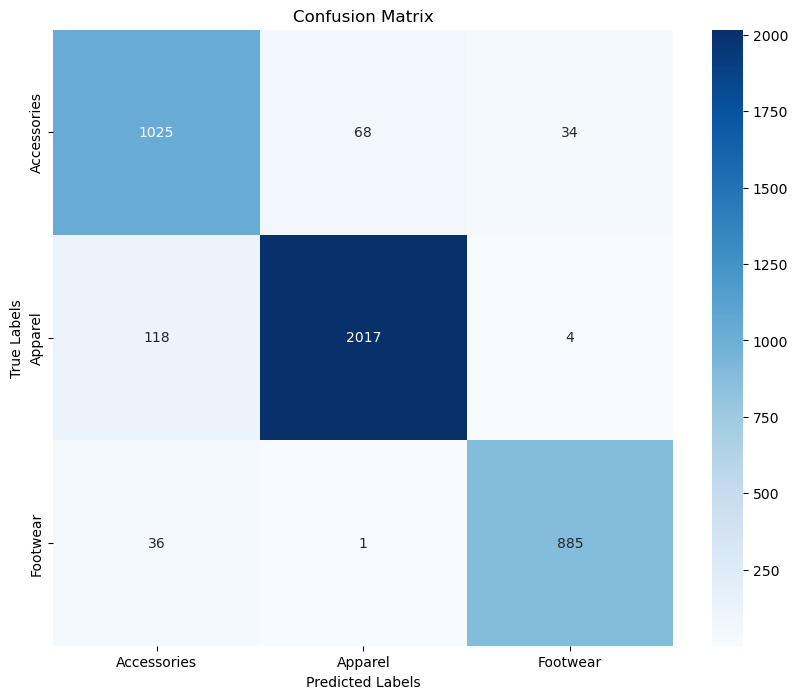

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
# Generating a classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

 Accessories       0.87      0.91      0.89      1127
     Apparel       0.97      0.94      0.95      2139
    Footwear       0.96      0.96      0.96       922

    accuracy                           0.94      4188
   macro avg       0.93      0.94      0.93      4188
weighted avg       0.94      0.94      0.94      4188



Analysis of the Classification Report To Understand the Model's Efficiency:

    Overall Accuracy:
        The model achieves 94% accuracy, meaning 94% of the predictions are correct.

    Class-wise Metrics:
        Accessories:
            Precision: 0.87 - 87% of items predicted as Accessories are actually Accessories.
            Recall: 0.91 - 91% of actual Accessories are correctly classified.
            F1-Score: 0.89 - A balanced measure of precision and recall.
        Apparel:
            Precision: 0.97 - 97% of items predicted as Apparel are actually Apparel.
            Recall: 0.94 - 94% of actual Apparel items are correctly classified.
            F1-Score: 0.95 - High performance, suggesting the model handles this class very well.
        Footwear:
            Precision: 0.96 - 96% of items predicted as Footwear are correct.
            Recall: 0.96 - 96% of actual Footwear items are correctly classified.
            F1-Score: 0.96 - Strong performance for this class.

    Averages:
        Macro Average: Precision, recall, and F1 are all 0.93–0.94, indicating balanced performance across all classes.
        Weighted Average: All metrics are 0.94, accounting for class imbalances in the dataset.

    Inference:
        The model performs well overall, especially on larger classes like Apparel and Footwear.
        Performance on Accessories is slightly lower, indicating potential room for improvement in classifying smaller or 
        more ambiguous features of this class. I will need to get more data to improve the classification of Accessories.

### Saving the Model

In [42]:
fashion_image_classifier.save("C:/Users/HP/Study Centre/Data Science/model/fashion_image_classifier_for_apparel_accessories_footwears.h5")

In [43]:
fashion_image_classifier.save("C:/Users/HP/Study Centre/Data Science/model/fashion_image_classifier_for_apparel_accessories_footwears.keras")

### Using the Model to Classify Random Fashion Images

In [65]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Loading the trained model
model = tf.keras.models.load_model("C:/Users/HP/Study Centre/Data Science/model/fashion_image_classifier_for_apparel_accessories_footwears.h5") 

# Folder containing images to classify
image_folder = "C:/Users/HP/Study Centre/Data Science/datasets/Fashion Product Images/test_data/" 

# Model configuration
input_shape = (60, 80)  

# Creating class labels based on class_indices order
class_indices = training_generator.class_indices
class_labels = list(class_indices.keys())  # Using this list to ensure the right order

# Function to classify images
def classify_images(image_folder, model):
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):  # Filter for image files
            img_path = os.path.join(image_folder, filename)
            
            # Load and preprocess the image
            img = load_img(img_path, target_size=input_shape)
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
            img_array = img_array / 255.0  # Rescale as done during training
            
            # Predict the class
            predictions = model.predict(img_array)
            predicted_class = [class_labels[np.argmax(pred)] for pred in predictions]
            confidence = np.max(predictions)
            
            # Print the result
            print(f"Image: {filename} | Predicted Class: {predicted_class} | Confidence: {confidence:.2f}")

# Classify all images in the specified folder
classify_images(image_folder, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Image: armless top on black pant.jpg | Predicted Class: ['Accessories'] | Confidence: 0.91
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image: bag.jpg | Predicted Class: ['Accessories'] | Confidence: 0.97
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: blouse.jpeg | Predicted Class: ['Apparel'] | Confidence: 0.94
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: cardigan.jpg | Predicted Class: ['Apparel'] | Confidence: 0.70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: Female suit.jpg | Predicted Class: ['Apparel'] | Confidence: 0.81
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image: shirt (2).jpg | Predicted Class: ['Apparel'] | Confidence: 0.74
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: shirt (3).jpg | Predicted Class: ['Apparel'] | Confidence: 0.97
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Image: shirt (4).jpg | Predicted Class: ['Apparel'] | Confidence: 0.63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image: shirt and knicker.jpg | Predicted Class: ['Accessories'] | Confid

##### The fashion images were accurately classified on a random dataset that was never used to train the model. Kindly take note of the confidence rate on each classification.

### Now, let's use the model to classify some of the 10% of the main dataset that was extracted earlier in Cell 17. Please note that this dataset was not part of the training or validation datasets.

In [81]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Loading the trained model
model = tf.keras.models.load_model("C:/Users/HP/Study Centre/Data Science/model/fashion_image_classifier_for_apparel_accessories_footwears.h5") 

# Folder containing images to classify
image_folder = "C:/Users/HP/Study Centre/Data Science/datasets/Fashion Product Images/test_data/test_data_3/" 

# Model configuration
input_shape = (60, 80)  

# Creating class labels based on class_indices order
class_indices = training_generator.class_indices
class_labels = list(class_indices.keys())  # Using this list to ensure the right order

# Function to classify images
def classify_images(image_folder, model):
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):  # Filter for image files
            img_path = os.path.join(image_folder, filename)
            
            # Load and preprocess the image
            img = load_img(img_path, target_size=input_shape)
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
            img_array = img_array / 255.0  # Rescale as done during training
            
            # Predict the class
            predictions = model.predict(img_array)
            predicted_class = [class_labels[np.argmax(pred)] for pred in predictions]
            confidence = np.max(predictions)
            
            # Print the result
            print(f"Image: {filename} | Predicted Class: {predicted_class} | Confidence: {confidence:.2f}")

# Classify all images in the specified folder
classify_images(image_folder, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Image: 11089.jpg | Predicted Class: ['Apparel'] | Confidence: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image: 14466.jpg | Predicted Class: ['Footwear'] | Confidence: 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Image: 15679.jpg | Predicted Class: ['Apparel'] | Confidence: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Image: 15903.jpg | Predicted Class: ['Footwear'] | Confidence: 0.96
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image: 16447.jpg | Predicted Class: ['Apparel'] | Confidence: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: 17091.jpg | Predicted Class: ['Accessories'] | Confidence: 0.52
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Image: 17124.jpg | Predicted Class: ['Accessories'] | Confidence: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: 30813.jpg | Predicted Class: ['Apparel'] | Confidence: 0.93
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Image: 32832.jpg | Predicted Class: ['Footwear'] | Confidence: 0.96
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Image

In [82]:
df[df["id"].isin([11089,14466,15679,15903,16447,17091,17124,30813,32832,36724,37307,37415,48583,48870,49715,51329,59698,6347,6769,8588])].sort_values('id')

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
16162,6347,Unisex,Footwear,Shoes,Casual Shoes,Navy Blue,Summer,2011.0,Casual,Converse Unisex Four Stitch Hi Navy Shoe,6347.jpg
29064,6769,Men,Apparel,Topwear,Shirts,Black,Summer,2011.0,Casual,Timberland Men Claremont Popl Black Shirt,6769.jpg
3066,8588,Men,Apparel,Topwear,Shirts,Blue,Fall,2011.0,Casual,Scullers Men Scul Blue Shirts,8588.jpg
36408,11089,Men,Apparel,Topwear,Shirts,Blue,Fall,2011.0,Casual,Scullers Men Blue Check Shirt,11089.jpg
23079,14466,Women,Footwear,Shoes,Heels,Taupe,Summer,2012.0,Casual,Enroute Women Casual Taupe Heels,14466.jpg
37607,15679,Men,Apparel,Bottomwear,Trousers,Khaki,Fall,2011.0,Casual,Highlander Men Classic Chinos Khaki Trousers,15679.jpg
41355,15903,Unisex,Footwear,Shoes,Casual Shoes,White,Winter,2013.0,Casual,Warner Bros Kids Unisex TJ Stud Sandal White C...,15903.jpg
27802,16447,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Levi's Men Stripes Blue Tshirts,16447.jpg
42195,17091,Women,Accessories,Wallets,Wallets,White,Winter,2015.0,Casual,Lino Perros Women Button Flap White Wallet,17091.jpg
14896,17124,Women,Accessories,Bags,Handbags,Black,Winter,2015.0,Casual,Lino Perros Women Golden Strap Black Handbag,17124.jpg


##### The classification of some of the 10% of the main data that was extracted in the cell 17 was accurate. The table above shows the actual classification. Kindly compare the table with the predicted classes.